# Taxonomy Evaluation

In [1]:
import pandas as pd
import numpy as np

sentences_df = pd.read_excel(f'../../RQ2_Taxonomy/results/sentence_analysis.xlsx')

In [2]:
RI_list = ['AS1', 'EH1', 'EH2', 'EH3', 'EH4', 'EH5', 'EH6', 'EH7', 'EH8', 'EH9', 'FI1', 'II1', 'IN1', 'LE1','LE2', 'MI1', 'OR1', 'OR2', 'OR3', 'OR4', 'OR5']

relevant_sentences = sentences_df[sentences_df[RI_list].sum(axis=1) > 0]

In [3]:
sentences_df.columns

Index(['sample_id', 'post_id', 'source', 'sentence', 'AS1', 'EH1', 'EH2',
       'EH3', 'EH4', 'EH5', 'EH6', 'EH7', 'EH8', 'EH9', 'FI1', 'II1', 'IN1',
       'LE1', 'LE2', 'MI1', 'OR1', 'OR2', 'OR3', 'OR4', 'OR5', 'post_type_id',
       'accepted_answer_id', 'parent_id', 'creation_date', 'score',
       'view_count', 'post_body', 'owner_user_id', 'last_editor_user_id',
       'last_edit_date', 'last_activity_date', 'post_title', 'tags',
       'answer_count', 'comment_count', 'content_license', 'link'],
      dtype='object')

## Step 1: Evaluating Structure

#### 1.3.- Orthogonality

According to the references paper: https://dl.acm.org/doi/abs/10.1145/3530019.3535305
They propose a 3-Step Evaluation: Suitable structure, Applicability, and Purpose.
Step 1 evaluates 5 criterias: Laconicity, Ludicity, Completeness, Soundness, and Orthogonality Matrix.

In [4]:
# Calculates the orthogonality matrix

def calculate_orthogonality_matrix(df, class_columns):
    R = df[class_columns].values
    num_classes = R.shape[1]
    orthogonality_matrix = np.zeros((num_classes, num_classes), dtype=int)
    
    for i in range(num_classes):
        for j in range(num_classes):
            if i != j:
                # Check if there is any overlap between classes i and j
                #if np.any(R[:, i] & R[:, j]):
                #    orthogonality_matrix[i, j] = 1.0
                # orthogonality_matrix[i, j] = np.sum(R[:, i] & R[:, j])

                # Calculate the percentage with respect to the number of elements in class i
                overlap_count = np.sum(R[:, i] & R[:, j])
                total_elements_class_i = np.sum(R[:, i])
                if total_elements_class_i > 0:
                    orthogonality_matrix[i, j] = (overlap_count / total_elements_class_i) * 100
                else:
                    orthogonality_matrix[i, j] = 0.0

    return orthogonality_matrix

orthogonality_matrix = calculate_orthogonality_matrix(relevant_sentences, RI_list)
print(f'Relevant Information:\n{RI_list[:]}')
print(f'Orthogonality Matrix:\n{orthogonality_matrix}')

Relevant Information:
['AS1', 'EH1', 'EH2', 'EH3', 'EH4', 'EH5', 'EH6', 'EH7', 'EH8', 'EH9', 'FI1', 'II1', 'IN1', 'LE1', 'LE2', 'MI1', 'OR1', 'OR2', 'OR3', 'OR4', 'OR5']
Orthogonality Matrix:
[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 11  0  0  0  0]
 [ 0  0  1  0  5  4  5 19 12  7  3  2  4  1  0  0  0  0  0  0  0]
 [ 0 12  0  0  0 62  0  0  0  0  0  0 12  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 25  0 25  0 25  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 35  0  0  0 35  0  7  0  0  7  7  0  0  0  0  0  0  0  0  0]
 [ 0  5  6  1  6  0  0  1  8  2  5  5  1  0  0  0  0  0  0  0  0]
 [ 0 41  0  0  0  0  0  8  0  8  0  0 16  0  0  0  0  0  0  0  0]
 [ 0 28  0  1  1  1  1  0  1  4  4  0  1  0  0  0  0  0  0  0  0]
 [ 0 19  0  0  0 11  0  1  0  1  0  1  4  3  0  0  0  1  0  0  0]
 [ 0 11  0  1  0  3  1  4  1  0  1  0  1  0  0  0  0  1  0  0  0]
 [ 0  1  0  0  0  2  0  1  0  0  0  3  0  0  0  1  1  0  0  0  0]
 [ 0  1  0  0  0  3  0  0  0  0  6  0  0  0  0  0  0  1  0  0  0]
 [ 0  6  1  0  0

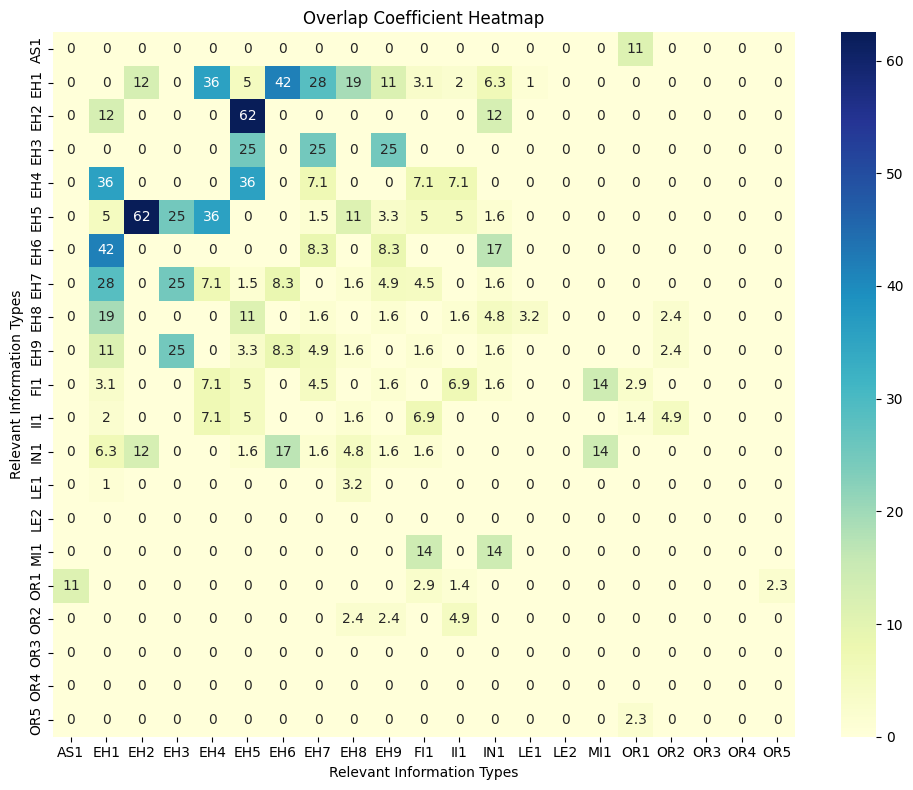

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Function to calculate the orthogonality matrix with the overlap coefficient
def calculate_overlap_coefficient_matrix(df, class_columns):
    R = df[class_columns].values
    num_classes = R.shape[1]
    overlap_matrix = np.zeros((num_classes, num_classes), dtype=float)
    
    for i in range(num_classes):
        for j in range(num_classes):
            if i != j:
                overlap_count = np.sum(R[:, i] & R[:, j])
                total_elements_class_i = np.sum(R[:, i])
                total_elements_class_j = np.sum(R[:, j])
                min_elements = min(total_elements_class_i, total_elements_class_j)
                if min_elements > 0:
                    overlap_matrix[i, j] = (overlap_count / min_elements) * 100
                else:
                    overlap_matrix[i, j] = 0.0

    return overlap_matrix

# Calculate the overlap coefficient matrix
overlap_coefficient_matrix = calculate_overlap_coefficient_matrix(sentences_df, RI_list)

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(overlap_coefficient_matrix, annot=True, cmap="YlGnBu", xticklabels=RI_list, yticklabels=RI_list)
plt.title('Overlap Coefficient Heatmap')
plt.xlabel('Relevant Information Types')
plt.ylabel('Relevant Information Types')
plt.tight_layout()
plt.show()

#### 1.1.- Scenario 1 and 2: using all the sentences and only relevant sentences 

In [6]:
# Calculate Laconicity, Completeness, Lucidity, and Soundness

def calculate_evaluation_structure(df_sentences):
    sum_RIs = np.sum(df_sentences[RI_list].values, axis=0)
    sum_sentences = np.sum(df_sentences[RI_list].values, axis=1)
    laconicity = np.mean(sum_sentences <=1)
    completeness = np.mean(sum_sentences >= 1)
    lucidity = np.mean(sum_RIs <= 1)
    soundness = np.mean(sum_RIs >= 1)
    dict = {'Laconicity': laconicity, 'Completeness': completeness, 'Lucidity': lucidity, 'Soundness': soundness}
    return dict

In [7]:
print("Using only relevant sentences: ", calculate_evaluation_structure(relevant_sentences))
print("Using all the sentences: ", calculate_evaluation_structure(sentences_df))

Using only relevant sentences:  {'Laconicity': 0.8835820895522388, 'Completeness': 1.0, 'Lucidity': 0.0, 'Soundness': 1.0}
Using all the sentences:  {'Laconicity': 0.9631612090680101, 'Completeness': 0.31643576826196473, 'Lucidity': 0.0, 'Soundness': 1.0}


#### 1.1.- Scenario 3 and 4: By Post with and without irrelevant sentences

In [8]:
# Create metric plots

import matplotlib.pyplot as plt

def plot_metrics(df):
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    # Plot Laconicity vs post_id
    axs[0, 0].plot(df['post_id'], df['Laconicity'], marker='o', linestyle='None')
    axs[0, 0].set_xlabel('Post ID')
    axs[0, 0].set_ylabel('Laconicity')
    axs[0, 0].set_ylim(0, 1)
    axs[0, 0].set_title('Laconicity vs Post ID')
    axs[0, 0].grid(True)

    # Plot Completeness vs post_id
    axs[0, 1].plot(df['post_id'], df['Completeness'], marker='o', linestyle='None')
    axs[0, 1].set_xlabel('Post ID')
    axs[0, 1].set_ylabel('Completeness')
    axs[0, 1].set_ylim(0, 1)
    axs[0, 1].set_title('Completeness vs Post ID')
    axs[0, 1].grid(True)

    # Plot Lucidity vs post_id
    axs[1, 0].plot(df['post_id'], df['Lucidity'], marker='o', linestyle='None')
    axs[1, 0].set_xlabel('Post ID')
    axs[1, 0].set_ylabel('Lucidity')
    axs[1, 0].set_ylim(0, 1)
    axs[1, 0].set_title('Lucidity vs Post ID')
    axs[1, 0].grid(True)

    # Plot Soundness vs post_id
    axs[1, 1].plot(df['post_id'], df['Soundness'], marker='o', linestyle='None')
    axs[1, 1].set_xlabel('Post ID')
    axs[1, 1].set_ylabel('Soundness')
    axs[1, 1].set_ylim(0, 1)
    axs[1, 1].set_title('Soundness vs Post ID')
    axs[1, 1].grid(True)

    plt.tight_layout()
    plt.show()

Considering only relevant sentences:

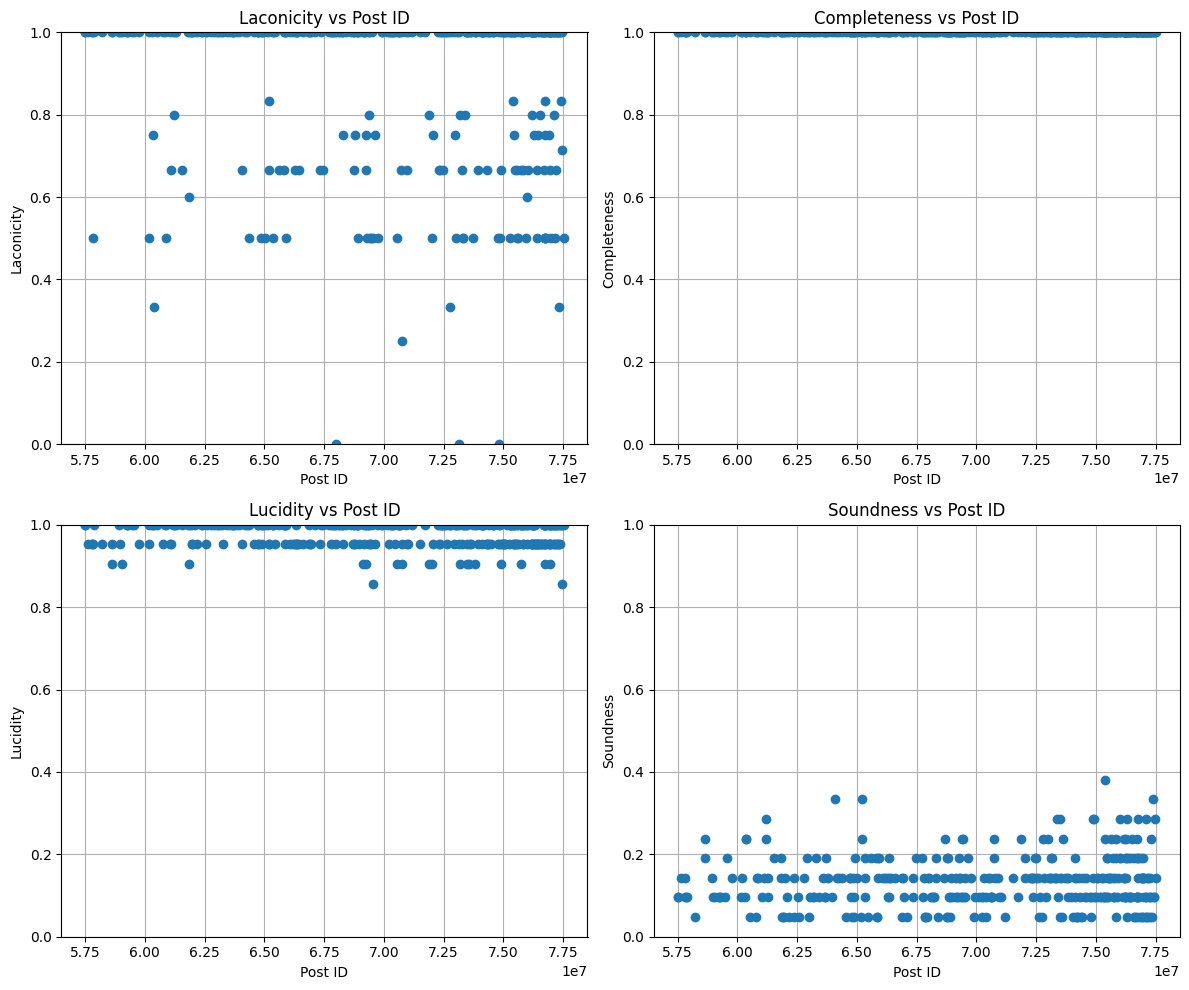

Mean values for the structure parameters:
 post_id         7.029981e+07
Laconicity      8.846537e-01
Completeness    1.000000e+00
Lucidity        9.769631e-01
Soundness       1.314791e-01
dtype: float64


In [9]:
metrics = relevant_sentences.groupby('post_id').apply(calculate_evaluation_structure)
df_to_plot = pd.DataFrame({
    'post_id': metrics.index,
    'Laconicity': metrics.apply(lambda x: x['Laconicity']),
    'Completeness': metrics.apply(lambda x: x['Completeness']),
    'Lucidity': metrics.apply(lambda x: x['Lucidity']),
    'Soundness': metrics.apply(lambda x: x['Soundness'])
})
plot_metrics(df_to_plot)
print("Mean values for the structure parameters:\n", df_to_plot.mean())

Considering all the sentences:

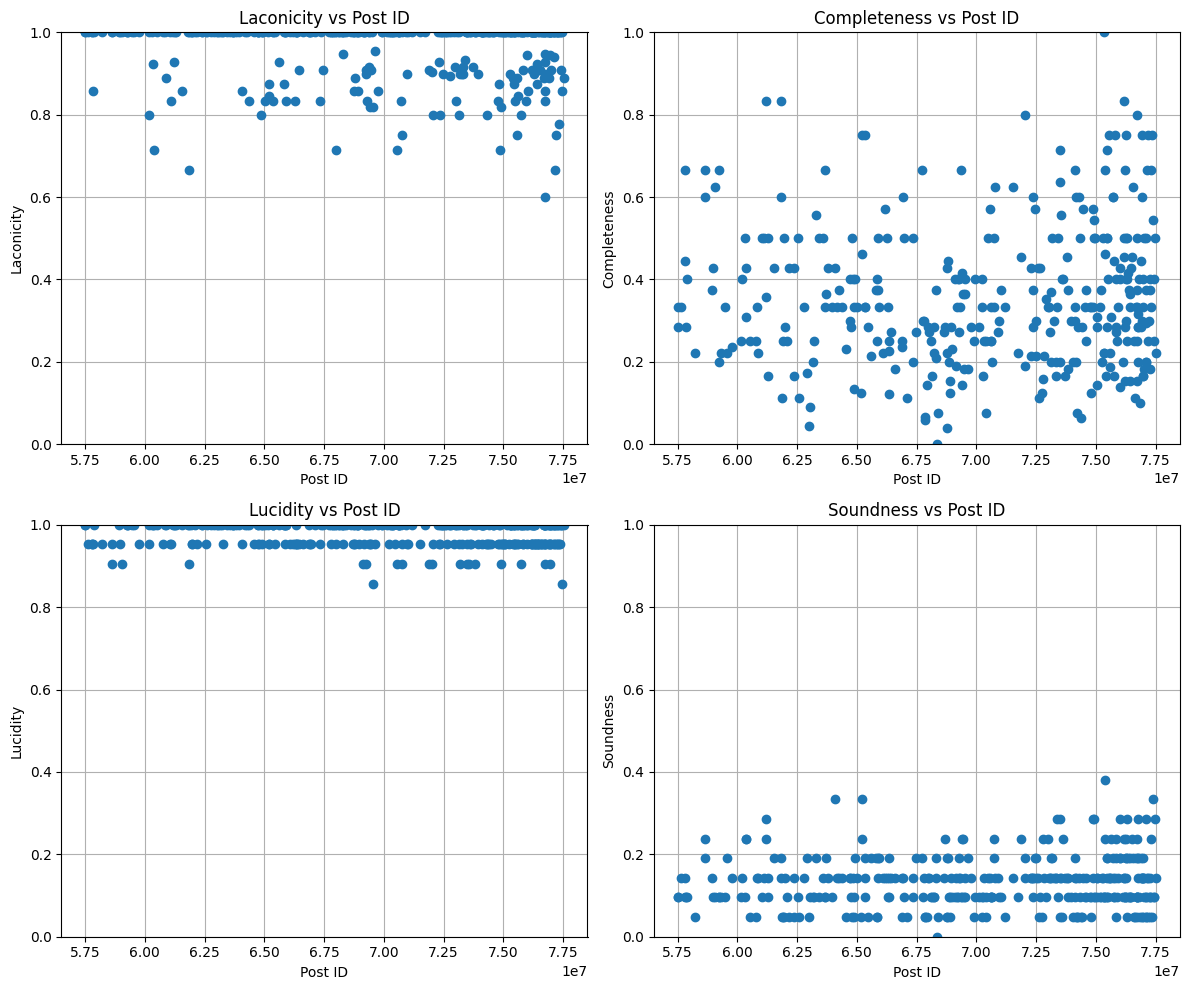

Mean values for the structure parameters:
 post_id         7.029407e+07
Laconicity      9.593605e-01
Completeness    3.576918e-01
Lucidity        9.770308e-01
Soundness       1.310924e-01
dtype: float64


In [10]:
metrics = sentences_df.groupby('post_id').apply(calculate_evaluation_structure)
df_to_plot = pd.DataFrame({
    'post_id': metrics.index,
    'Laconicity': metrics.apply(lambda x: x['Laconicity']),
    'Completeness': metrics.apply(lambda x: x['Completeness']),
    'Lucidity': metrics.apply(lambda x: x['Lucidity']),
    'Soundness': metrics.apply(lambda x: x['Soundness'])
})
plot_metrics(df_to_plot)
print("Mean values for the structure parameters:\n", df_to_plot.mean())

### Scenario 5: Adding a new category for Non-Relevant 'NR' sentences

In [11]:
import pandas as pd
import numpy as np

# Create copies of the original DataFrames
all_sentences_plus_NR = sentences_df.copy()
sample_sentences_plus_NR = relevant_sentences.copy()

# Add the 'NR' column to the DataFrames
all_sentences_plus_NR['NR'] = all_sentences_plus_NR[RI_list].sum(axis=1) + 1
all_sentences_plus_NR.loc[all_sentences_plus_NR['NR'] > 1, 'NR'] = 0

sample_sentences_plus_NR['NR'] = sample_sentences_plus_NR[RI_list].sum(axis=1) + 1
sample_sentences_plus_NR.loc[sample_sentences_plus_NR['NR'] > 1, 'NR'] = 0

# Function to calculate evaluation structure
def calculate_evaluation_structure(df):
    # Append 'NR' directly as a string
    RI_list_NR = RI_list + ['NR']
    sum_RIs = np.sum(df[RI_list_NR].values, axis=0)
    sum_sentences = np.sum(df[RI_list_NR].values, axis=1)
    
    laconity = np.mean(sum_sentences <= 1)
    completeness = np.mean(sum_sentences >= 1)
    lucidity = np.mean(sum_RIs <= 1)
    soundness = np.mean(sum_RIs > 1)
    
    return {
        'Laconity': laconity,
        'Completeness': completeness,
        'Lucidity': lucidity,
        'Soundness': soundness
    }

# Example usage of the function
print(calculate_evaluation_structure(all_sentences_plus_NR))

# Group by 'post_id' and apply the evaluation function
metrics = all_sentences_plus_NR.groupby('post_id').apply(calculate_evaluation_structure)

# Convert metrics to DataFrame
df_to_plot = pd.DataFrame({
    'post_id': metrics.index,
    'Laconity': metrics.apply(lambda x: x['Laconity']),
    'Completeness': metrics.apply(lambda x: x['Completeness']),
    'Lucidity': metrics.apply(lambda x: x['Lucidity']),
    'Soundness': metrics.apply(lambda x: x['Soundness'])
})

# Print or plot metrics as needed
print(df_to_plot.mean())


{'Laconity': 0.9631612090680101, 'Completeness': 1.0, 'Lucidity': 0.0, 'Soundness': 1.0}
post_id         7.029407e+07
Laconity        9.593605e-01
Completeness    1.000000e+00
Lucidity        9.347594e-01
Soundness       6.524064e-02
dtype: float64


## Step 3: Evaluating Purpose

#### 3.1.- Relevance

In [12]:
# Group by 'post_id' and calculate the fraction of RI categories used for each post
fraction_of_ri_per_post = sentences_df.groupby('post_id')[RI_list].apply(lambda x: (x.sum(axis=0) > 0).sum() / len(RI_list))

print("fraction of relevant classes considering all the posts: 1.0")
print("average fraction of relevant classes considering post by posts:", fraction_of_ri_per_post.mean())


fraction of relevant classes considering all the posts: 1.0
average fraction of relevant classes considering post by posts: 0.13109243697478992


## Step 2: Evaluating Applicability

In [13]:
import pandas as pd

# Assuming 'all_sentences_df' is already loaded with your data
ri_columns = RI_list  # Assuming RI columns are defined in RI_list

# Define a mapping from RI columns to DN categories
dn_mapping = {
    'EH': ['EH1', 'EH2', 'EH3', 'EH4', 'EH5', 'EH6', 'EH7', 'EH8', 'EH9'],
    'IN': ['IN1'],
    'II': ['II1'],
    'MI': ['MI1'],
    'FI': ['FI1'],
    'OR': ['OR1', 'OR2', 'OR3', 'OR4', 'OR5'],
    'AS': ['AS1'],
    'LE': ['LE1', 'LE2']
}

# Step 1: Sample 4 Sentences Per RI Category
sampled_sentences_df = pd.DataFrame()

for ri in ri_columns:
    # Filter the sentences where the current RI category is present
    ri_sentences = sentences_df[sentences_df[ri] > 0]
    
    # If there are at least 4 sentences, sample 4. Otherwise, take as many as are available
    if len(ri_sentences) >= 4:
        ri_sample = ri_sentences.sample(n=4, replace=False, random_state=0)
    else:
        ri_sample = ri_sentences
    
    # Append the sampled sentences to the final DataFrame
    sampled_sentences_df = pd.concat([sampled_sentences_df, ri_sample])

# Step 2: Add Non-Relevant Sentences Until Total = 60
# Non-relevant sentences are those with no RI
non_relevant_sentences = sentences_df[sentences_df[ri_columns].sum(axis=1) == 0]

# Sample 60 non-relevant sentences
if len(non_relevant_sentences) >= 60:
    non_relevant_sample = non_relevant_sentences.sample(n=60, replace=False, random_state=0)
else:
    non_relevant_sample = non_relevant_sentences
sampled_sentences_df = pd.concat([sampled_sentences_df, non_relevant_sample])

# Step 3: Calculate Basic Statistics

# Number of sentences with only one RI, two RIs, etc.
sampled_sentences_df['RI_count'] = sampled_sentences_df[ri_columns].sum(axis=1)
ri_counts = sampled_sentences_df['RI_count'].value_counts().sort_index()

# Number of sentences from body or title
source_counts = sampled_sentences_df['source'].value_counts()

# Calculate statistics by Developer Need (DN)
dn_counts = {}
for dn, ris in dn_mapping.items():
    sampled_sentences_df[dn] = sampled_sentences_df[ris].sum(axis=1) > 0
    dn_counts[dn] = sampled_sentences_df[dn].sum()

# Displaying the results
print("Basic Statistics of the Sampled Sentences:\n")
print(f"Total number of sampled sentences: {len(sampled_sentences_df)}")
print("\nNumber of sentences with 1, 2, 3, etc. RIs:")
print(ri_counts)
print("\nNumber of sentences from 'body' and 'title':")
print(source_counts)
print("\nDeveloper Need (DN) Counts:")
print(pd.Series(dn_counts))

# Display the final sampled sentences DataFrame
print("\nSampled Sentences:")
print(sampled_sentences_df[['sentence', 'source', 'RI_count'] + list(dn_mapping.keys())])


Basic Statistics of the Sampled Sentences:

Total number of sampled sentences: 144

Number of sentences with 1, 2, 3, etc. RIs:
RI_count
0    60
1    64
2    19
3     1
Name: count, dtype: int64

Number of sentences from 'body' and 'title':
source
body     127
title     17
Name: count, dtype: int64

Developer Need (DN) Counts:
EH    36
IN     7
II     4
MI     4
FI     5
OR    21
AS     4
LE     8
dtype: int64

Sampled Sentences:
                                               sentence source  RI_count  \
2510  Any alternative to pass the same through api u...   body         1   
1419  Actually, I'd prefer an alternative approach w...   body         2   
1363  Are you aware of any way to speed up/shorten t...   body         1   
1935  What are the alternatives to using GitHub Acti...   body         1   
1096  As soon as I pushed it to github.com, my githu...   body         2   
...                                                 ...    ...       ...   
2663                              

In [14]:
# Save the sampled sentences to an Excel file
file_name = 'post_sentences_pre_selection.xlsx'
sampled_sentences_df.to_excel(file_name, index=True)

In [15]:
sampled_sentences_df

,sample_id,post_id,source,sentence,AS1,EH1,EH2,EH3,EH4,EH5,...,link,RI_count,EH,IN,II,MI,FI,OR,AS,LE
2510,268,75941428,body,Any alternative to pass the same through api u...,1,0,0,0,0,0,...,https://stackoverflow.com/q/75941428,1,False,False,False,False,False,False,True,False
1419,147,69646986,body,"Actually, I'd prefer an alternative approach w...",1,0,0,0,0,0,...,https://stackoverflow.com/q/69646986,2,False,False,False,False,False,True,True,False
1363,142,69396004,body,Are you aware of any way to speed up/shorten t...,1,0,0,0,0,0,...,https://stackoverflow.com/q/69396004,1,False,False,False,False,False,False,True,False
1935,201,73417515,body,What are the alternatives to using GitHub Acti...,1,0,0,0,0,0,...,https://stackoverflow.com/q/73417515,1,False,False,False,False,False,False,True,False
1096,118,68303446,body,"As soon as I pushed it to github.com, my githu...",0,1,0,0,0,0,...,https://stackoverflow.com/q/68303446,2,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2663,282,76279262,body,Kindly suggest.,0,0,0,0,0,0,...,https://stackoverflow.com/q/76279262,0,False,False,False,False,False,False,False,False
2945,312,76937222,body,I created the workflow and I realized that I c...,0,0,0,0,0,0,...,https://stackoverflow.com/q/76937222,0,False,False,False,False,False,False,False,False
1762,186,72646802,body,Literally anything you can give me would be ap...,0,0,0,0,0,0,...,https://stackoverflow.com/q/72646802,0,False,False,False,False,False,False,False,False
2352,249,75438906,body,"If I understand correctly, it is not possible ...",0,0,0,0,0,0,...,https://stackoverflow.com/q/75438906,0,False,False,False,False,False,False,False,False


In [16]:
sentences_to_evaluate = pd.read_excel(f'post_sentences_selection.xlsx')

In [17]:
sentences_to_evaluate.columns.values[0] = 'sentence_id'
sentences_to_evaluate.columns

Index(['sentence_id', 'sample_id', 'post_id', 'source', 'sentence', 'AS1',
       'EH1', 'EH2', 'EH3', 'EH4', 'EH5', 'EH6', 'EH7', 'EH8', 'EH9', 'FI1',
       'II1', 'IN1', 'LE1', 'LE2', 'MI1', 'OR1', 'OR2', 'OR3', 'OR4', 'OR5',
       'OR6', 'post_type_id', 'accepted_answer_id', 'parent_id',
       'creation_date', 'score', 'view_count', 'post_body', 'owner_user_id',
       'last_editor_user_id', 'last_edit_date', 'last_activity_date',
       'post_title', 'tags', 'answer_count', 'comment_count',
       'content_license', 'link', 'RI_count', 'EH', 'IN', 'II', 'MI', 'FI',
       'OR', 'AS', 'LE'],
      dtype='object')

In [18]:
# Save the sampled sentences randomized for annotators to an Excel file

df_for_annotators = sentences_to_evaluate.sample(frac=1, random_state=0).reset_index(drop=True).copy()
df_for_annotators['RI_category'] = ''
file_name = 'post_sentences.xlsx'
df_for_annotators[['sentence_id','sentence', 'RI_category']].to_excel(file_name, index=True, index_label='index')

In [19]:
# Select sentences to use as examples in the definitions file

# Save the sampled sentences# # Step 1: Exclude sentences already in sentences_to_evaluate by comparing 'sentence_id' with the index of sentences_df
# excluded_sentence_ids = sentences_to_evaluate['sentence_id']
# filtered_sentences = sentences_df[~sentences_df.index.isin(excluded_sentence_ids)]

# # Step 2: Initialize an empty DataFrame to store the random selections
# random_selection_df = pd.DataFrame()

# # Step 3: Loop through each RI type and select 5 random sentences
# for ri in RI_list:
#     # Filter sentences that contain the current RI type
#     ri_sentences = filtered_sentences[filtered_sentences[ri] > 0]
    
#     # Randomly sample 5 sentences with seed 0
#     if len(ri_sentences) >= 5:
#         ri_sample = ri_sentences.sample(n=5, random_state=0)
#     else:
#         ri_sample = ri_sentences  # If fewer than 5 sentences, take all available
    
#     # Append the selected sentences to the random_selection_df
#     random_selection_df = pd.concat([random_selection_df, ri_sample])

# # Display the selected sentences
# print(random_selection_df)

# # Optional: Save the result to an Excel or CSV file
# random_selection_df.to_excel('random_selected_sentences_per_ri.xlsx', index=False)



In [20]:
sentences_to_evaluate

,sentence_id,sample_id,post_id,source,sentence,AS1,EH1,EH2,EH3,EH4,...,link,RI_count,EH,IN,II,MI,FI,OR,AS,LE
0,2510,268,75941428,body,Any alternative to pass the same through api u...,1,0,0,0,0,...,https://stackoverflow.com/q/75941428,1,False,False,False,False,False,False,True,False
1,1419,147,69646986,body,"Actually, I'd prefer an alternative approach w...",1,0,0,0,0,...,https://stackoverflow.com/q/69646986,2,False,False,False,False,False,True,True,False
2,1363,142,69396004,body,Are you aware of any way to speed up/shorten t...,1,0,0,0,0,...,https://stackoverflow.com/q/69396004,1,False,False,False,False,False,False,True,False
3,2810,297,76705251,body,problem comes when I create a release branch.,0,1,0,0,0,...,https://stackoverflow.com/q/76705251,1,True,False,False,False,False,False,False,False
4,204,23,60380374,body,The build job passes but the deploy one fails.,0,1,0,0,1,...,https://stackoverflow.com/q/60380374,2,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2477,265,75838160,body,Both repository A and B are part of the same o...,0,0,0,0,0,...,https://stackoverflow.com/q/75838160,0,False,False,False,False,False,False,False,False
96,927,100,66918575,body,Any leads in this regard would be helpful.,0,0,0,0,0,...,https://stackoverflow.com/q/66918575,0,False,False,False,False,False,False,False,False
97,129,16,59474920,body,"I have the proper secrets defined, and this is...",0,0,0,0,0,...,https://stackoverflow.com/q/59474920,0,False,False,False,False,False,False,False,False
98,3126,334,77355720,body,I'm working on a project that needs to work on...,0,0,0,0,0,...,https://stackoverflow.com/q/77355720,0,False,False,False,False,False,False,False,False


### Calculating metrics with annotators

In [21]:
sentences_to_evaluate

,sentence_id,sample_id,post_id,source,sentence,AS1,EH1,EH2,EH3,EH4,...,link,RI_count,EH,IN,II,MI,FI,OR,AS,LE
0,2510,268,75941428,body,Any alternative to pass the same through api u...,1,0,0,0,0,...,https://stackoverflow.com/q/75941428,1,False,False,False,False,False,False,True,False
1,1419,147,69646986,body,"Actually, I'd prefer an alternative approach w...",1,0,0,0,0,...,https://stackoverflow.com/q/69646986,2,False,False,False,False,False,True,True,False
2,1363,142,69396004,body,Are you aware of any way to speed up/shorten t...,1,0,0,0,0,...,https://stackoverflow.com/q/69396004,1,False,False,False,False,False,False,True,False
3,2810,297,76705251,body,problem comes when I create a release branch.,0,1,0,0,0,...,https://stackoverflow.com/q/76705251,1,True,False,False,False,False,False,False,False
4,204,23,60380374,body,The build job passes but the deploy one fails.,0,1,0,0,1,...,https://stackoverflow.com/q/60380374,2,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2477,265,75838160,body,Both repository A and B are part of the same o...,0,0,0,0,0,...,https://stackoverflow.com/q/75838160,0,False,False,False,False,False,False,False,False
96,927,100,66918575,body,Any leads in this regard would be helpful.,0,0,0,0,0,...,https://stackoverflow.com/q/66918575,0,False,False,False,False,False,False,False,False
97,129,16,59474920,body,"I have the proper secrets defined, and this is...",0,0,0,0,0,...,https://stackoverflow.com/q/59474920,0,False,False,False,False,False,False,False,False
98,3126,334,77355720,body,I'm working on a project that needs to work on...,0,0,0,0,0,...,https://stackoverflow.com/q/77355720,0,False,False,False,False,False,False,False,False


In [22]:
df_annotator_x00 = pd.read_excel(f'results/post_sentences_x00.xlsx')

In [23]:
df_annotator_x00

,index,sentence_id,sentence,RI_category
0,0,2755,"The pipeline fails at step ""Build and push Doc...",EH1 EH5 EH6 EH8
1,1,677,I try to execute only some tests on pushing so...,NaN
2,2,1363,Are you aware of any way to speed up/shorten t...,OR4 OR6
3,3,1281,Should I create another entry in my matrix tha...,OR5
4,4,961,I've been trying to get ESLint to automaticall...,FI1
...,...,...,...,...
95,95,927,Any leads in this regard would be helpful.,NaN
96,96,576,The action that they specify in a pull request...,NaN
97,97,5,If I wanted to run an arbitrary command and ma...,OR4
98,98,2567,How to build dynamic UI in github actions simi...,OR6


In [24]:
import pandas as pd

# Assuming df_annotator_x00 is your DataFrame
ri_list = ['AS1', 'EH1', 'EH2', 'EH3', 'EH4', 'EH5', 'EH6', 'EH7', 'EH8', 'EH9', 
           'FI1', 'II1', 'IN1', 'LE1', 'LE2', 'MI1', 'OR1', 'OR2', 'OR3', 'OR4', 'OR5', 'OR6']

# Initialize the RI columns with 0
for ri in ri_list:
    df_annotator_x00[ri] = 0

# Fill in the RI columns with 1 where appropriate
for ri in ri_list:
    df_annotator_x00[ri] = df_annotator_x00['RI_category'].apply(lambda x: 1 if isinstance(x, str) and ri in x.split() else 0)

# Display the updated DataFrame
print(df_annotator_x00)


    index  sentence_id                                           sentence  \
0       0         2755  The pipeline fails at step "Build and push Doc...   
1       1          677  I try to execute only some tests on pushing so...   
2       2         1363  Are you aware of any way to speed up/shorten t...   
3       3         1281  Should I create another entry in my matrix tha...   
4       4          961  I've been trying to get ESLint to automaticall...   
..    ...          ...                                                ...   
95     95          927         Any leads in this regard would be helpful.   
96     96          576  The action that they specify in a pull request...   
97     97            5  If I wanted to run an arbitrary command and ma...   
98     98         2567  How to build dynamic UI in github actions simi...   
99     99          683  Maybe you have some experiences, recommendatio...   

        RI_category  AS1  EH1  EH2  EH3  EH4  EH5  ...  IN1  LE1  LE2  MI1 

In [25]:
import pandas as pd

# Assuming df_annotator_x00 and sentences_to_evaluate are already loaded DataFrames
# and have been processed to include the same set of RI columns

# Step 1: Ensure the RI columns exist in both DataFrames (we already have them from previous steps)
ri_list = ['AS1', 'EH1', 'EH2', 'EH3', 'EH4', 'EH5', 'EH6', 'EH7', 'EH8', 'EH9', 
           'FI1', 'II1', 'IN1', 'LE1', 'LE2', 'MI1', 'OR1', 'OR2', 'OR3', 'OR4', 'OR5', 'OR6']

# Step 2: Merge the DataFrames on 'sentence_id'
merged_df = pd.merge(df_annotator_x00[['sentence_id'] + ri_list], 
                     sentences_to_evaluate[['sentence_id'] + ri_list], 
                     on='sentence_id', 
                     suffixes=('_annotator', '_evaluate'))

# Step 3: Compare the RI columns and create a new column to indicate match or no match
for ri in ri_list:
    merged_df[ri + '_match'] = merged_df.apply(lambda row: 1 if row[ri + '_annotator'] == row[ri + '_evaluate'] else 0, axis=1)

# Step 4: Add a column to count the number of mismatches
merged_df['no_match_count'] = merged_df[[ri + '_match' for ri in ri_list]].apply(lambda row: row.value_counts().get(0, 0), axis=1)

# Display the comparison results including the count of no matches
print(merged_df[['sentence_id', 'no_match_count'] + [ri + '_match' for ri in ri_list]])



    sentence_id  no_match_count  AS1_match  EH1_match  EH2_match  EH3_match  \
0          2755               2          1          1          1          1   
1           677               0          1          1          1          1   
2          1363               3          0          1          1          1   
3          1281               2          1          1          1          1   
4           961               1          1          1          1          1   
..          ...             ...        ...        ...        ...        ...   
94          927               0          1          1          1          1   
95          576               0          1          1          1          1   
96            5               2          1          1          1          1   
97         2567               2          1          1          1          1   
98          683               2          1          1          1          1   

    EH4_match  EH5_match  EH6_match  EH7_match  ...

In [26]:
merged_df[['sentence_id','no_match_count']]

,sentence_id,no_match_count
0,2755,2
1,677,0
2,1363,3
3,1281,2
4,961,1
...,...,...
94,927,0
95,576,0
96,5,2
97,2567,2


In [27]:
no_match_distribution = merged_df['no_match_count'].value_counts().sort_index()
no_match_distribution

no_match_count
0    38
1    19
2    25
3    11
4     5
5     1
Name: count, dtype: int64

In [28]:
import pandas as pd

# Assuming merged_df is already created as in the previous code

# Initialize dictionaries to store the metrics
precision_scores = {}
recall_scores = {}
f1_scores = {}

# Calculate Precision, Recall, and F1 Score for each RI category
for ri in ri_list:
    # True Positives (TP)
    tp = ((merged_df[ri + '_annotator'] == 1) & (merged_df[ri + '_evaluate'] == 1)).sum()
    
    # False Positives (FP)
    fp = ((merged_df[ri + '_annotator'] == 0) & (merged_df[ri + '_evaluate'] == 1)).sum()
    
    # False Negatives (FN)
    fn = ((merged_df[ri + '_annotator'] == 1) & (merged_df[ri + '_evaluate'] == 0)).sum()
    
    # Precision
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    precision_scores[ri] = precision
    
    # Recall
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    recall_scores[ri] = recall
    
    # F1 Score
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    f1_scores[ri] = f1

# Combine the results into a DataFrame
metrics_df = pd.DataFrame({
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1 Score': f1_scores
}).transpose()

# Display the metrics
print(metrics_df)

# Optional: Save the metrics to a CSV or Excel file
metrics_df.to_excel('RI_metrics_scores.xlsx')


           AS1       EH1       EH2  EH3   EH4       EH5       EH6       EH7  \
Precision  0.0  1.000000  0.333333  0.0  0.25  0.125000  0.333333  0.600000   
Recall     0.0  0.352941  0.111111  0.0  0.25  0.333333  0.166667  0.375000   
F1 Score   0.0  0.521739  0.166667  0.0  0.25  0.181818  0.222222  0.461538   

                EH8  EH9  ...       IN1       LE1       LE2  MI1       OR1  \
Precision  0.666667  0.0  ...  0.600000  0.333333  0.500000  0.0  0.500000   
Recall     1.000000  0.0  ...  0.750000  0.500000  1.000000  0.0  0.400000   
F1 Score   0.800000  0.0  ...  0.666667  0.400000  0.666667  0.0  0.444444   

                OR2       OR3       OR4       OR5       OR6  
Precision  0.666667  0.333333  0.666667  0.666667  0.333333  
Recall     0.400000  0.200000  0.333333  0.200000  0.125000  
F1 Score   0.500000  0.250000  0.444444  0.307692  0.181818  

[3 rows x 22 columns]


In [29]:
import pandas as pd

# Assuming merged_df is already created and has the RI columns with '_annotator' and '_evaluate' suffixes

# Step 1: Identify Non-Relevant (NR) sentences for both annotators
# If all RI columns are 0 or False, then the sentence is Non-Relevant
merged_df['NR_annotator'] = (merged_df[[ri + '_annotator' for ri in ri_list]].sum(axis=1) == 0).astype(int)
merged_df['NR_evaluate'] = (merged_df[[ri + '_evaluate' for ri in ri_list]].sum(axis=1) == 0).astype(int)

# Step 2: Calculate True Positives, False Positives, and False Negatives for NR
tp_nr = ((merged_df['NR_annotator'] == 1) & (merged_df['NR_evaluate'] == 1)).sum()
fp_nr = ((merged_df['NR_annotator'] == 0) & (merged_df['NR_evaluate'] == 1)).sum()
fn_nr = ((merged_df['NR_annotator'] == 1) & (merged_df['NR_evaluate'] == 0)).sum()

# Step 3: Calculate Precision, Recall, and F1 Score for NR
precision_nr = tp_nr / (tp_nr + fp_nr) if (tp_nr + fp_nr) > 0 else 0
recall_nr = tp_nr / (tp_nr + fn_nr) if (tp_nr + fn_nr) > 0 else 0
f1_nr = 2 * (precision_nr * recall_nr) / (precision_nr + recall_nr) if (precision_nr + recall_nr) > 0 else 0

# Step 4: Display the metrics
print(f"NR Precision: {precision_nr}")
print(f"NR Recall: {recall_nr}")
print(f"NR F1 Score: {f1_nr}")


NR Precision: 0.6764705882352942
NR Recall: 0.9583333333333334
NR F1 Score: 0.7931034482758621


In [30]:
merged_df.to_excel('merged_df.xlsx')

In [31]:
import pandas as pd

# Assuming merged_df is already created and has the RI columns with '_annotator' and '_evaluate' suffixes

# Developer Needs (DN) mapping
dn_mapping = {
    'EH': ['EH1', 'EH2', 'EH3', 'EH4', 'EH5', 'EH6', 'EH7', 'EH8', 'EH9'],
    'IN': ['IN1'],
    'II': ['II1'],
    'MI': ['MI1'],
    'FI': ['FI1'],
    'OR': ['OR1', 'OR2', 'OR3', 'OR4', 'OR5', 'OR6'],
    'AS': ['AS1'],
    'LE': ['LE1', 'LE2']
}

# Step 1: Create binary columns for each DN category in both annotator and evaluate
for dn, ris in dn_mapping.items():
    merged_df[dn + '_annotator'] = merged_df[[ri + '_annotator' for ri in ris]].max(axis=1)
    merged_df[dn + '_evaluate'] = merged_df[[ri + '_evaluate' for ri in ris]].max(axis=1)

# Step 2: Initialize dictionaries to store the metrics for DN categories
precision_scores_dn = {}
recall_scores_dn = {}
f1_scores_dn = {}

# Step 3: Calculate Precision, Recall, and F1 Score for each DN category
for dn in dn_mapping.keys():
    # True Positives (TP)
    tp = ((merged_df[dn + '_annotator'] == 1) & (merged_df[dn + '_evaluate'] == 1)).sum()
    
    # False Positives (FP)
    fp = ((merged_df[dn + '_annotator'] == 0) & (merged_df[dn + '_evaluate'] == 1)).sum()
    
    # False Negatives (FN)
    fn = ((merged_df[dn + '_annotator'] == 1) & (merged_df[dn + '_evaluate'] == 0)).sum()
    
    # Precision
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    precision_scores_dn[dn] = precision
    
    # Recall
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    recall_scores_dn[dn] = recall
    
    # F1 Score
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    f1_scores_dn[dn] = f1

# Combine the results into a DataFrame
metrics_dn_df = pd.DataFrame({
    'Precision': precision_scores_dn,
    'Recall': recall_scores_dn,
    'F1 Score': f1_scores_dn
}).transpose()

# Display the metrics for Developer Needs (DN)
print(metrics_dn_df)

# Optional: Save the metrics to a CSV or Excel file
metrics_dn_df.to_excel('DN_metrics_scores.xlsx')


                 EH        IN   II   MI        FI        OR   AS        LE
Precision  0.888889  0.600000  0.0  0.0  1.000000  1.000000  0.0  0.400000
Recall     0.827586  0.750000  0.0  0.0  0.230769  0.593750  0.0  0.666667
F1 Score   0.857143  0.666667  0.0  0.0  0.375000  0.745098  0.0  0.500000


In [32]:
import numpy as np
import pandas as pd

# Assuming `merged_df` has the original annotations from the original annotator
np.random.seed(0)  # For reproducibility

# Step 1: Create three copies of the original annotations for the new annotators
annotator_01_df = merged_df.copy()
annotator_02_df = merged_df.copy()
annotator_03_df = merged_df.copy()

# Step 2: Introduce random variations
# Define a probability of flipping a label (e.g., 5% chance of changing a label)
flip_prob = 0.05

def apply_random_flips(df, ri_list, flip_prob):
    for ri in ri_list:
        flip_mask = np.random.rand(len(df)) < flip_prob
        df[ri + '_annotator'] = np.where(flip_mask, 1 - df[ri + '_annotator'], df[ri + '_annotator'])
    return df

# Apply random flips for each annotator
annotator_01_df = apply_random_flips(annotator_01_df, ri_list, flip_prob)
annotator_02_df = apply_random_flips(annotator_02_df, ri_list, flip_prob)
annotator_03_df = apply_random_flips(annotator_03_df, ri_list, flip_prob)

# Step 3: Add DN categories based on RI categories
for dn, ris in dn_mapping.items():
    annotator_01_df[dn + '_annotator'] = annotator_01_df[[ri + '_annotator' for ri in ris]].max(axis=1)
    annotator_02_df[dn + '_annotator'] = annotator_02_df[[ri + '_annotator' for ri in ris]].max(axis=1)
    annotator_03_df[dn + '_annotator'] = annotator_03_df[[ri + '_annotator' for ri in ris]].max(axis=1)

# Step 4: Save the new DataFrames to Excel files
annotator_01_df.to_excel('Annotator_01_results.xlsx', index=False)
annotator_02_df.to_excel('Annotator_02_results.xlsx', index=False)
annotator_03_df.to_excel('Annotator_03_results.xlsx', index=False)

# Display a sample of the new annotator DataFrames
print("Annotator 01 Sample:\n", annotator_01_df.head())
print("Annotator 02 Sample:\n", annotator_02_df.head())
print("Annotator 03 Sample:\n", annotator_03_df.head())



Annotator 01 Sample:
    sentence_id  AS1_annotator  EH1_annotator  EH2_annotator  EH3_annotator  \
0         2755              0              0              0              0   
1          677              0              0              0              0   
2         1363              0              0              0              0   
3         1281              0              0              0              0   
4          961              0              0              0              0   

   EH4_annotator  EH5_annotator  EH6_annotator  EH7_annotator  EH8_annotator  \
0              0              1              1              0              1   
1              0              0              0              0              0   
2              1              0              0              0              0   
3              0              0              0              0              0   
4              0              0              0              1              0   

   ...  MI_annotator  MI_eva

In [33]:
import pandas as pd
import krippendorff

# Assuming annotator_01_df, annotator_02_df, and annotator_03_df contain the classifications
# List of RI or DN classes to calculate the alpha for
RI_list = ['AS1', 'EH1', 'EH2', 'EH3', 'EH4', 'EH5', 'EH6', 'EH7', 'EH8', 'EH9', 'FI1', 'II1', 'IN1', 'LE1', 'LE2', 'MI1', 'OR1', 'OR2', 'OR3', 'OR4', 'OR5', 'OR6']
ri_classes = [ri + '_annotator' for ri in RI_list]


# Prepare to store the alpha results
alpha_results = {}

# Loop over each class and calculate Krippendorff's alpha
for ri_class in ri_classes:
    # Collect the ratings for this specific class from each annotator's DataFrame
    class_data = pd.DataFrame({
        'Annotator_01': annotator_01_df[ri_class].values,
        'Annotator_02': annotator_02_df[ri_class].values,
        'Annotator_03': annotator_03_df[ri_class].values
    })
    
    # Transpose the DataFrame to match the expected format (rows: items, columns: annotators)
    ratings = class_data.T.values
    
    # Calculate Krippendorff's alpha for this specific class
    alpha = krippendorff.alpha(reliability_data=ratings, level_of_measurement='nominal')
    
    # Store the result
    alpha_results[ri_class] = alpha

# Print the alpha results for each class
for ri_class, alpha_value in alpha_results.items():
    print(f"Krippendorff's alpha for {ri_class}: {alpha_value}")


Krippendorff's alpha for AS1_annotator: 0.013646461440812385
Krippendorff's alpha for EH1_annotator: 0.777610818933133
Krippendorff's alpha for EH2_annotator: 0.47048300536672627
Krippendorff's alpha for EH3_annotator: 0.16028368794326242
Krippendorff's alpha for EH4_annotator: 0.39058823529411757
Krippendorff's alpha for EH5_annotator: 0.412274368231047
Krippendorff's alpha for EH6_annotator: 0.608235294117647
Krippendorff's alpha for EH7_annotator: 0.5274584929757343
Krippendorff's alpha for EH8_annotator: 0.07829181494661919
Krippendorff's alpha for EH9_annotator: 0.2780487804878049
Krippendorff's alpha for FI1_annotator: 0.53273850377488
Krippendorff's alpha for II1_annotator: 0.3223443223443224
Krippendorff's alpha for IN1_annotator: 0.3424309742938749
Krippendorff's alpha for LE1_annotator: 0.21647058823529408
Krippendorff's alpha for LE2_annotator: 0.19159663865546217
Krippendorff's alpha for MI1_annotator: -0.0019912385503781938
Krippendorff's alpha for OR1_annotator: 0.5533607

In [34]:
import pandas as pd
import krippendorff

# Assuming annotator_01_df, annotator_02_df, and annotator_03_df are your DataFrames
# Combine all the annotation columns into a single column for each annotator
combined_annotator_01 = annotator_01_df[[col for col in annotator_01_df.columns if col.endswith('_annotator')]].values.flatten()
combined_annotator_02 = annotator_02_df[[col for col in annotator_02_df.columns if col.endswith('_annotator')]].values.flatten()
combined_annotator_03 = annotator_03_df[[col for col in annotator_03_df.columns if col.endswith('_annotator')]].values.flatten()

# Combine these into a single DataFrame
combined_data = pd.DataFrame({
    'Annotator_01': combined_annotator_01,
    'Annotator_02': combined_annotator_02,
    'Annotator_03': combined_annotator_03
})

# Transpose the DataFrame so that each row corresponds to an annotator's ratings
ratings = combined_data.values.T

# Calculate the overall Krippendorff's alpha
overall_alpha = krippendorff.alpha(reliability_data=ratings, level_of_measurement='nominal')

print(f"Overall Krippendorff's alpha: {overall_alpha}")


Overall Krippendorff's alpha: 0.4860768931638092
